# Manual Calculation of PCA

* **Step 1**: Standardize the dataset. (For the exam, only manual standardization is accepted)
* **Step 2**: Calculate the covariance matrix for the features in the dataset.
$$
\text{COV} = \frac{(X-\mu)^T (X-\mu)}{N-1} 
$$
* **Step 3**: Calculate the eigenvalues and eigenvectors for the covariance matrix.
* **Step 4**: Sort eigenvalues and their corresponding eigenvectors.
* **Step 5**: Pick $k$ eigenvalues and form a matrix of eigenvectors ($k\leq d$).
* **Step 6**: Transform the original matrix.
$$
Z = w^T (X-\mu)
$$
where $w$ is the sorted eigenvectors and $Z$ is the values in the projected space.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [6]:
# load iris dataset
iris = load_iris()
# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines

#selecting only first 4 columns as they are the independent(X) variable
# any kind of feature selection or correlation analysis should be first done on these
data=iris_df.iloc[:,[0,1,2,3]]

In [8]:
data_norm = pd.DataFrame(np.array((data - data.mean()) / np.std(data)))
print(data_norm)

            0         1         2         3
0   -0.900681  1.019004 -1.340227 -1.315444
1   -1.143017 -0.131979 -1.340227 -1.315444
2   -1.385353  0.328414 -1.397064 -1.315444
3   -1.506521  0.098217 -1.283389 -1.315444
4   -1.021849  1.249201 -1.340227 -1.315444
..        ...       ...       ...       ...
145  1.038005 -0.131979  0.819596  1.448832
146  0.553333 -1.282963  0.705921  0.922303
147  0.795669 -0.131979  0.819596  1.053935
148  0.432165  0.788808  0.933271  1.448832
149  0.068662 -0.131979  0.762758  0.790671

[150 rows x 4 columns]


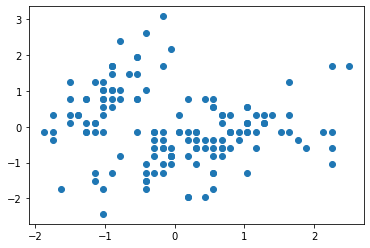

In [10]:
plt.scatter((data_norm[0]),(data_norm[1]))
plt.show()

In [12]:
# in the exam you should manully calculate it
covariance = data_norm.cov()
covariance

,0,1,2,3
0,1.006711,-0.118359,0.877604,0.823431
1,-0.118359,1.006711,-0.431316,-0.368583
2,0.877604,-0.431316,1.006711,0.969328
3,0.823431,-0.368583,0.969328,1.006711


In [14]:
# Slide 22 lab 7
covariance = np.dot((data_norm - data_norm.mean()).T, (data_norm - data_norm.mean()))/(data_norm.shape[0]-1)
covariance

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [15]:
value, vector = np.linalg.eig(covariance)

In [16]:
vector

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [17]:
value

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [18]:
W_T = vector.T
# sorting from the highest to lowest by its eigen values.
W_T = W_T[sorted(range(len(value)), key=lambda k: value[k], reverse=True)]
W_T

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [20]:
Z = W_T.dot((data_norm - data_norm.mean()).T)
Z = pd.DataFrame(Z.T)
Z.head()

,0,1,2,3
0,-2.264703,-0.480027,-0.127706,0.024168
1,-2.080961,0.674134,-0.234609,0.103007
2,-2.364229,0.341908,0.044201,0.028377
3,-2.299384,0.597395,0.091290,-0.065956
4,-2.389842,-0.646835,0.015738,-0.035923


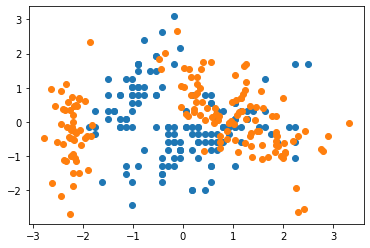

In [22]:
import matplotlib.pyplot as plt
plt.scatter((data_norm[0]),(data_norm[1]))
plt.scatter((Z[0]),(Z[1]))
plt.show()

# Package calculation

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf.head()
# You can read about the reason for the negative sign of PC2 in this thread:
# https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative

,pc1,pc2
0,2.446005,-0.066672
1,1.565938,-0.340439
2,0.999909,-0.724535
3,0.013810,-0.892150
4,-0.564463,-0.924766


# Others

In [14]:
# A comment on the StandardScaler() calculation. 
# You may see a difference in its result compared to manual calculation below:
from sklearn.preprocessing import StandardScaler
df_st_package = StandardScaler().fit_transform(df)
print("The result using the package \n", df_st_package[0:5])

df_st_manual1 = np.array((df - df.mean()) / df.std())
print("\n The manual calculation Type I \n", df_st_manual1[0:5])

df_st_manual2 = np.array((df - df.mean()) / np.std(df))
print("\n The manual calculation Type II \n", df_st_manual2[0:5])

# sklearn uses numpy for standard deviation computation. It takes the denominator of n-1.
# However, It the denominator of pandas is n. It is the matter of degree of freedom.

The result using the package 
 [[-1.77673135 -1.68244272]
 [-1.34801213 -0.86655843]
 [-1.21936666 -0.19471887]
 [-0.64061058  0.62108023]
 [-0.25477319  1.05304402]]

 The manual calculation Type I 
 [[-1.74222842 -1.64977082]
 [-1.32183465 -0.84973046]
 [-1.19568738 -0.19093756]
 [-0.62817036  0.60901927]
 [-0.24982567  1.03259462]]

 The manual calculation Type II 
 [[-1.77673135 -1.68244272]
 [-1.34801213 -0.86655843]
 [-1.21936666 -0.19471887]
 [-0.64061058  0.62108023]
 [-0.25477319  1.05304402]]


### LDA 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [3]:
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

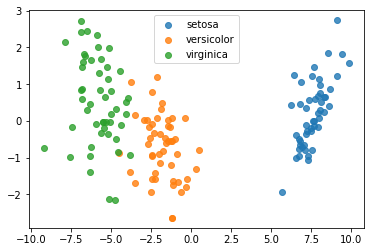

In [11]:
#create LDA plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, cmap='rainbow',
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

In [6]:
model.explained_variance_ratio_

array([0.9912126, 0.0087874])

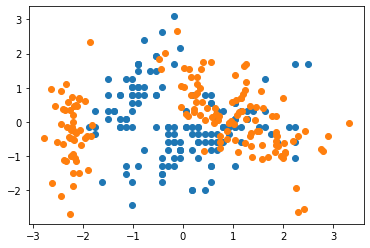

In [23]:
import matplotlib.pyplot as plt
plt.scatter((data_norm[0]),(data_norm[1]))
plt.scatter((Z[0]),(Z[1]))
plt.show()

In [78]:
# Question 2: Implement Kmeans algorithm over the live.csv dataset
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [79]:
## You can use the following library for clustering
from sklearn.cluster import KMeans

In [80]:
## read from csv file
data = pd.read_csv("Live.csv")

In [81]:
##The following code displays the shape of data set
print(data.shape)
print(data.head())
# summary about dataset
data.info()

## EDA 
# check for missing values
data.isna().sum() 

data = data.dropna(axis=1)
data.isna().sum() 

data.drop(['status_id', 'status_published'], axis=1, inplace=True)
#sns.pairplot(data)

X = data


y = data['status_type']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

(7050, 16)
                          status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0          1         1           0    

In [82]:
from sklearn.preprocessing import MinMaxScaler

min_scal = MinMaxScaler()

X = min_scal.fit_transform(X)

In [83]:
k_means = KMeans(n_clusters=2, random_state=42) 

k_means.fit(X)

KMeans(n_clusters=2, random_state=42)

In [84]:
# model parameter study
k_means.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

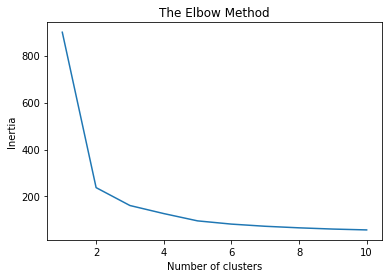

In [88]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 7)
    
    kmeans.fit(X)
    
    cs.append(kmeans.inertia_)

# plot the 
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [94]:
# K-Means model with 3 clusters

k_means3 = KMeans(n_clusters=3,max_iter = 400, n_init = 10, random_state=7)

k_means3.fit(X)

# check how many of the samples were correctly labeled
labels = k_means3.labels_

correct_labels3 = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels3, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels3/float(y.size)))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


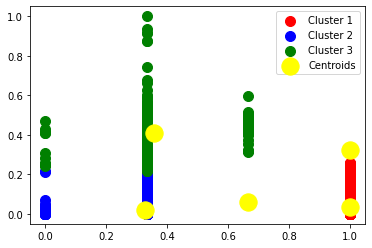

In [99]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300,c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()


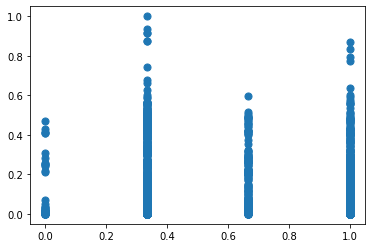

In [91]:
plt.scatter(X[:, 0], X[:, 1], s=50) # s=50 is size of the blobs

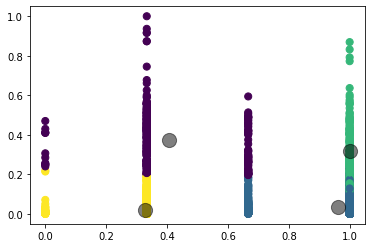

In [100]:
kmeans = KMeans(n_clusters=4) # from sklearn
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

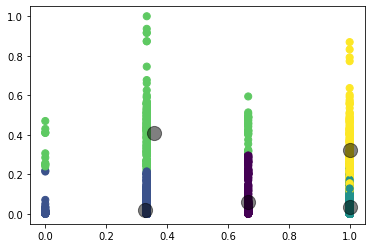

In [101]:
kmeans = KMeans(n_clusters=5) # from sklearn
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);